# MANE 4333
## Homework 5
### Your Name

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


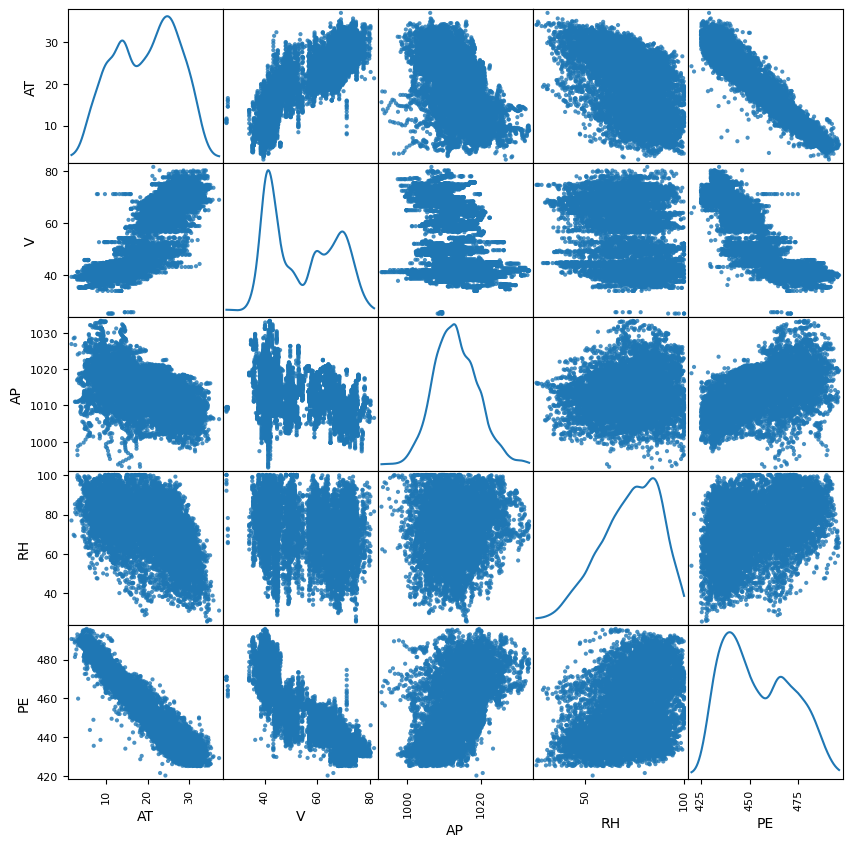

In [23]:
# Cell 2
# Load the data and prepare a scatter matrix
import pandas as pd

data = pd.read_excel('Folds5x2_pp.xlsx')
pd.plotting.scatter_matrix(data, alpha=0.8, figsize=(10, 10), diagonal='kde')
print(data)

### Cell 3

*Interpret the scatter matrix produced in cell 2. Are there any outliers? Do any variables appear to be associated with PE? If there is an association, is it positive or negative and ist it linear or non-linear?*

In [24]:
# Cell 4
# Enter the Python code to scale the data. Assign  70% of the data to training and 30% of the data to test. Create data frames for the training and testing sets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X=data.drop(columns='PE')
#print(X)
y=data.drop(data.columns[[0,1,2,3]],axis=1)
y=y.values.ravel()
#print(y)

h5_scaler=MinMaxScaler()
X_scaled=h5_scaler.fit_transform(X,y)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)

#print(X_train.shape)



In [25]:
# Cell 5
# Enter the Python code to specify a neural network model that is appropriate for the data and fit the model.
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

mlp = MLPRegressor(hidden_layer_sizes=(8,), max_iter=100000, random_state=42, activation='logistic',solver='sgd')

# Train the model
mlp.fit(X_train, y_train)



MLPRegressor(activation='logistic', hidden_layer_sizes=(8,), max_iter=100000,
             random_state=42, solver='sgd')

The neural network trained for 20 epochs
Mean Squared Error: 293.1806545871012
R-squared: -7.16726520963995e-05


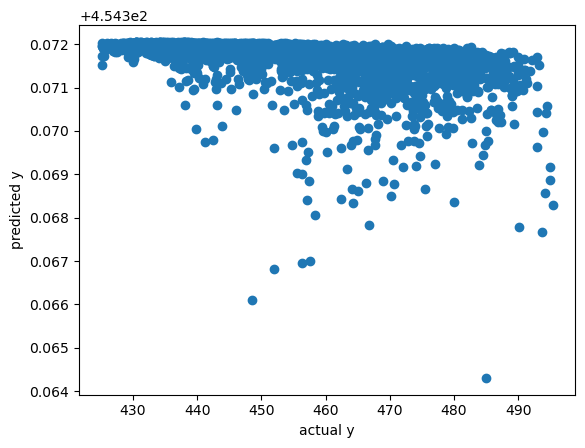

In [26]:
# Cell 6
# Enter the Python code to evaluate the fitted neural network on both the training and testing datasets.

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The neural network trained for %d epochs"%(mlp.n_iter_))
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create the plot
plt.scatter(y_test, y_pred)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

### Cell 7

*Comment on the results of fitting the neural network model. Does the fitted model work well for both the training and testing sets? Are there any signs of overfitting?*